<div style="border-radius:10px; border:black solid; padding: 15px; background-color: Green; font-size:100%; text-align:left">
<p style="font-family:Georgia; font-weight:bold; letter-spacing: 2px; color:white; font-size:200%; text-align:center;padding: 0px;"> Banking Churn Analysis & Modelling</p></div>

<div align="center">
  <img src="https://m.economictimes.com/thumb/msid-100281493,width-1200,height-900,resizemode-4,imgsize-14062/banks-request-rbi-for-more-time-for-new-loan-provisioning-system.jpg" alt="Image Description" width="300" height="200">
</div>

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown>📊 Business Objective:</font></h3>
   
- The goal would be to identify which customers are most likely to churn (leave the service) and understand the key factors driving their decision to leave. `Churn Reduction through Predictive Analytics`
- Churn refers to the process by which a customer stops doing business with a company.

<h3 align="left"><font color=brown>📊 Business Value:</font></h3>
- Customer retention is critical for a bank’s profitability. Predicting which customers are likely to churn can help the bank take proactive steps (e.g., offering personalized services or incentives) to retain valuable customers.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import iplot
from plotly.subplots import make_subplots as sp

import warnings
warnings.filterwarnings("ignore")

# **Data Representation**

In [2]:
df = pd.read_csv('/kaggle/input/churn-modelling/Churn_Modelling.csv')

In [3]:
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


* **RowNumber**: Index of the row.
* **CustomerId**: Unique identifier for each customer.
* **Surname**: Customer's last name (may not be very useful for analysis).
* **CreditScore**: The credit score of the customer [300 : 850].
    - Poor credit: 300 to 579.
    - Fair credit: 580 to 669.
    - Good credit: 670 to 739.
    - Very good credit: 740 to 799.
    - Excellent credit: 800 to 850.
* **Geography**: Country of the customer (e.g., France, Spain).
* **Gender**: Gender of the customer (e.g., Male, Female).
* **Age**: Age of the customer.
* **Tenure**: Number of years the customer has been with the bank.
* **Balance**: Account balance of the customer.
* **NumOfProducts**: Number of products the customer has purchased.
* **HasCrCard**: Whether the customer has a credit card (1 = Yes, 0 = No).
* **IsActiveMember**: Whether the customer is an active member (1 = Yes, 0 = No).
* **EstimatedSalary**: Estimated annual salary of the customer.
* **Exited**: Whether the customer left the bank (1 = Yes, 0 = No) — this is likely the target for churn prediction.


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


# **Data Wrangling**

In [6]:
# Checking for duplicated values
df.duplicated().sum()

0

In [7]:
# Checking for null values
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
# Setting index as the RowNumber column
df.set_index('RowNumber', inplace = True)
df

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1


In [9]:
df['Surname'].nunique()
# 2932 out of 10000 Surname values are unique
# Drop Surname column

2932

In [10]:
df.drop(columns = ['Surname'], inplace = True)

In [11]:
df.head(7)

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,
1,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
6,15574012,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
7,15592531,822,France,Male,50,7,0.00,2,1,1,10062.80,0


In [12]:
df['CustomerId'].nunique()
# CustomerId column is correct

10000

# **Univariate Analysis**

### **CreditScore Column**

In [13]:
df['CreditScore'].describe()

count    10000.000000
mean       650.528800
std         96.653299
min        350.000000
25%        584.000000
50%        652.000000
75%        718.000000
max        850.000000
Name: CreditScore, dtype: float64

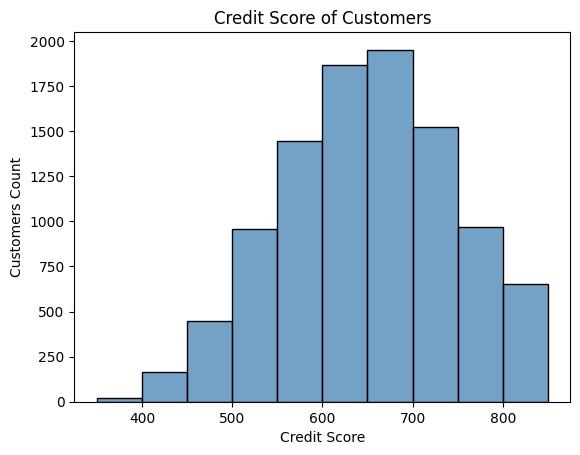

In [14]:
bins = np.arange(350, 851, 50)
sns.histplot(df['CreditScore'], bins=bins, kde=False, color='steelblue')

plt.title('Credit Score of Customers')
plt.xlabel('Credit Score')
plt.ylabel('Customers Count')
plt.show()

In [15]:
# Checking if there are values out of normal CreditScore range (350, 850)
df[(df['CreditScore'] < 350) | (df['CreditScore'] > 850)]
# Min is 350, Max is 850

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,


### **Geography Column**

In [16]:
df['Geography'].describe()

count      10000
unique         3
top       France
freq        5014
Name: Geography, dtype: object

In [17]:
Geography_count = df['Geography'].value_counts()
Geography_count

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [18]:
Geography_percent = df['Geography'].value_counts(normalize = True)*100
Geography_percent

Geography
France     50.14
Germany    25.09
Spain      24.77
Name: proportion, dtype: float64

In [19]:
# Frequency Table
freq_table = pd.DataFrame(data = {'Count': Geography_count, 'Percentage%': Geography_percent})
freq_table

,Count,Percentage%
Geography,,
France,5014,50.14
Germany,2509,25.09
Spain,2477,24.77


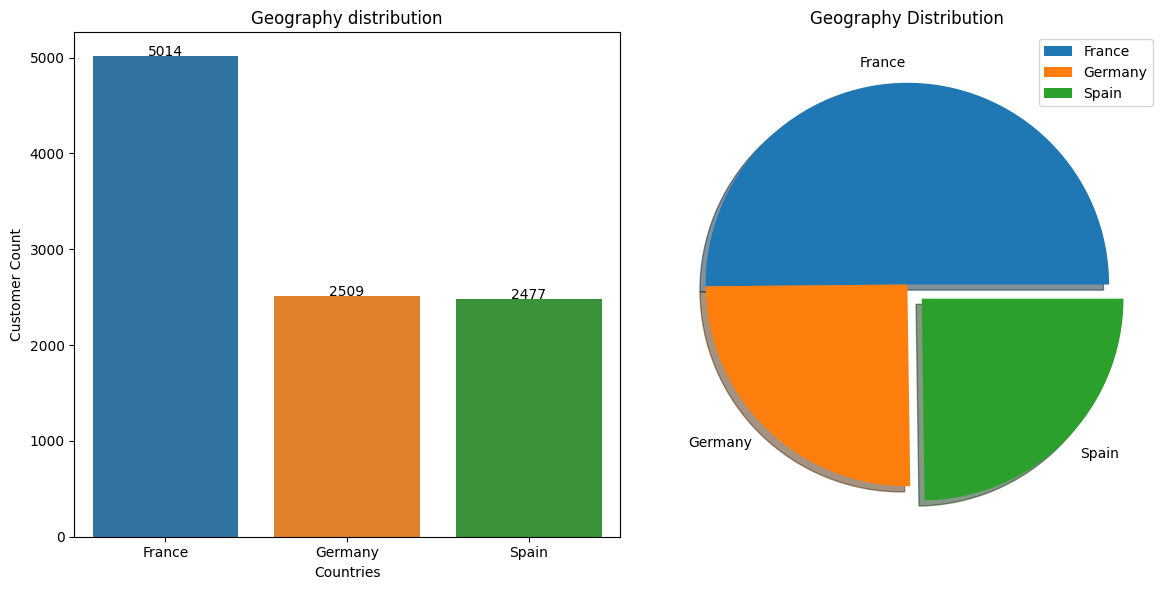

In [20]:
Geography_count = df['Geography'].value_counts()

plt.figure(figsize = (12, 6))

plt.subplot(1, 2, 1)
sns.barplot(x = df['Geography'].value_counts().index,
            y = df['Geography'].value_counts())
plt.title('Geography distribution')
plt.xlabel('Countries')
plt.ylabel('Customer Count')

# Display text over bar charts
for i in range(len(Geography_count)):
    plt.text(i, Geography_count[i] + 7, Geography_count[i], ha = 'center')


plt.subplot(1, 2, 2)
plt.pie(x = df['Geography'].value_counts(),
        labels = df['Geography'].value_counts().index,
        explode = [0, 0, 0.1],
        normalize = True,
        shadow = True)

plt.title('Geography Distribution')
plt.legend(loc = 'upper right')

plt.tight_layout()
plt.show()

## **Gender Column**

In [21]:
df['Gender'].describe()

count     10000
unique        2
top        Male
freq       5457
Name: Gender, dtype: object

In [22]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [23]:
df['Gender'].value_counts(normalize = True)*100

Gender
Male      54.57
Female    45.43
Name: proportion, dtype: float64

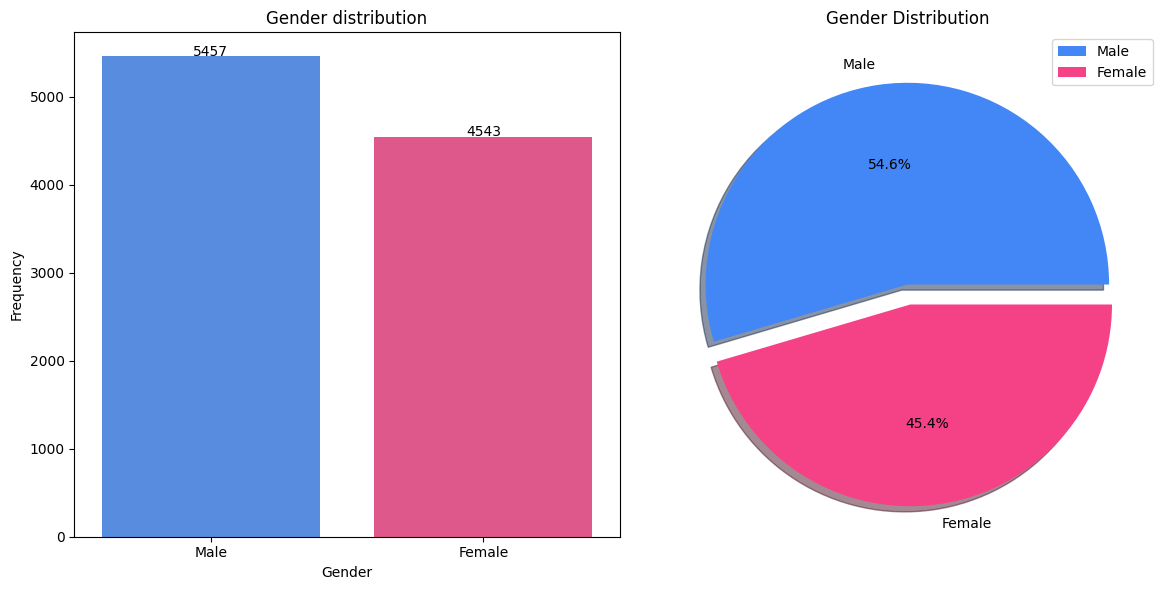

In [24]:
gender_count = df['Gender'].value_counts()

plt.figure(figsize = (12, 6))

plt.subplot(1, 2, 1)
sns.barplot(x = df['Gender'].value_counts().index,
            y = df['Gender'].value_counts(),
            palette=['#4287f5', '#f54287'])
plt.title('Gender distribution')
plt.xlabel('Gender')
plt.ylabel('Frequency')

# Display text over bar charts
for i in range(len(gender_count)):
    plt.text(i, gender_count[i] + 6, gender_count[i], ha = 'center')


plt.subplot(1, 2, 2)
plt.pie(x = df['Gender'].value_counts(),
        labels = df['Gender'].value_counts().index,
        explode = [0, 0.1],
        normalize = True,
        autopct = '%1.1f%%',
        shadow = True,
        colors = ['#4287f5', '#f54287'])

plt.title('Gender Distribution')
plt.legend(loc = 'upper right')

plt.tight_layout()
plt.show()

In [25]:
gender_counts = df['Gender'].value_counts()

# Plot using Plotly

fig = px.pie(
    names = gender_counts.index,
    values = gender_counts.values,
    title="Gender Percentages",
    color_discrete_sequence=['#4287f5', '#f54287']
).update_traces(textinfo='percent + label + value')

fig.show()

## **Age Column**

In [26]:
df['Age'].describe()

count    10000.000000
mean        38.921800
std         10.487806
min         18.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         92.000000
Name: Age, dtype: float64

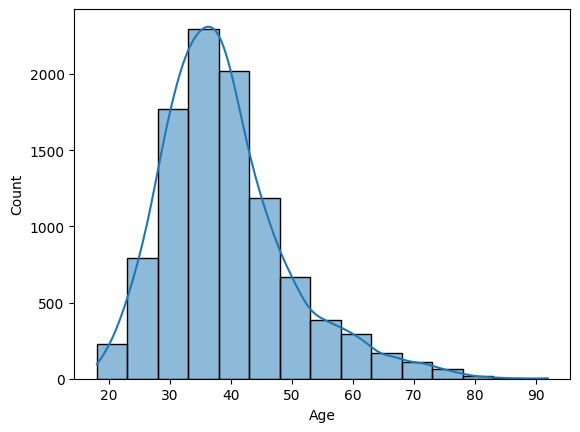

In [27]:
bins = np.arange(18, 93, 5)
sns.histplot(df['Age'], bins = bins, kde = True)
plt.show()

In [28]:
df[df['Age'] >= 85]

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,
2459,15813303,513,Spain,Male,88,10,0.00,2,1,1,52952.24,0
3034,15578006,787,France,Female,85,10,0.00,2,1,1,116537.96,0
6444,15764927,753,France,Male,92,3,121513.31,1,0,1,195563.99,0
6760,15660878,705,France,Male,92,1,126076.24,2,1,1,34436.83,0


<Axes: >

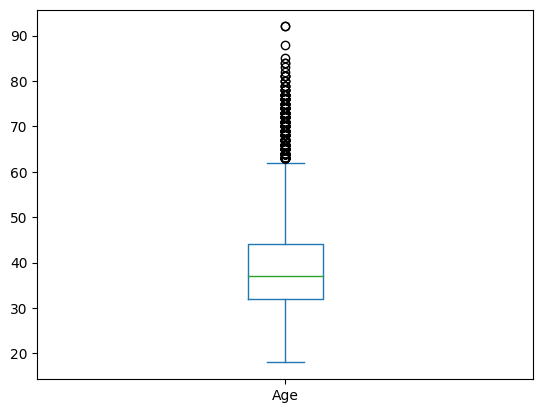

In [29]:
df['Age'].plot(kind = 'box')

In [30]:
# Detecting Outliers

Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1

Lower_bound = Q1 -1.5*IQR
Upper_bound = Q3 + 1.5*IQR

print('Lower bound is', Lower_bound)
print('Upper bound is', Upper_bound)

Lower bound is 14.0
Upper bound is 62.0


In [31]:
df[df['Age'] > Upper_bound]

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,
59,15623944,511,Spain,Female,66,4,0.00,1,1,0,1643.11,1
86,15805254,652,Spain,Female,75,10,0.00,2,1,1,114675.75,0
105,15804919,670,Spain,Female,65,1,0.00,1,1,1,177655.68,1
159,15589975,646,France,Female,73,6,97259.25,1,0,1,104719.66,0
182,15789669,510,France,Male,65,2,0.00,2,1,1,48071.61,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9754,15705174,656,Germany,Male,68,7,153545.11,1,1,1,186574.68,0
9766,15777067,445,France,Male,64,2,136770.67,1,0,1,43678.06,0
9833,15814690,595,Germany,Female,64,2,105736.32,1,1,1,89935.73,1


## **Tenure Column**

In [32]:
df['Tenure'].describe()

count    10000.000000
mean         5.012800
std          2.892174
min          0.000000
25%          3.000000
50%          5.000000
75%          7.000000
max         10.000000
Name: Tenure, dtype: float64

In [33]:
Tenure_count = df['Tenure'].value_counts()
Tenure_count

Tenure
2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: count, dtype: int64

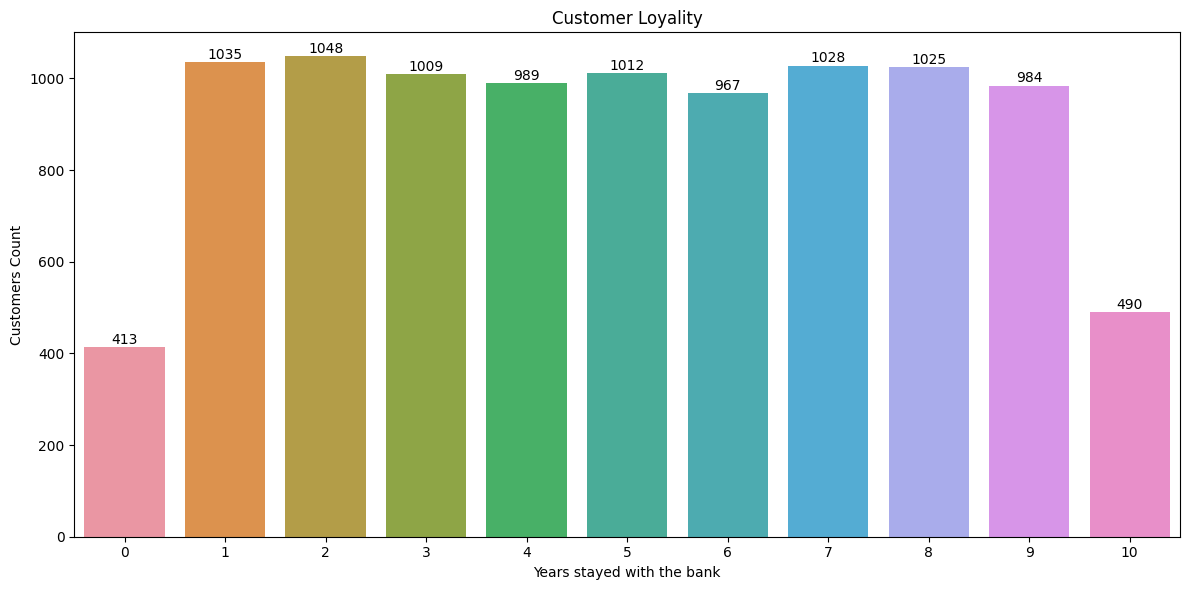

In [34]:
# Tenure: Number of years the customer has been with the bank.

plt.figure(figsize = (12, 6))
sns.barplot(x = df['Tenure'].value_counts().index,
            y = df['Tenure'].value_counts())
plt.title('Customer loyalty')
plt.xlabel('Years stayed with the bank')
plt.ylabel('Customers Count')

# Display text over bar charts
for i in range(len(Tenure_count)):
    plt.text(i, Tenure_count[i] + 7, Tenure_count[i], ha = 'center')

plt.title('Customer Loyality')

plt.tight_layout()
plt.show()

## **Balance Column**

In [35]:
df['Balance'].describe()

count     10000.000000
mean      76485.889288
std       62397.405202
min           0.000000
25%           0.000000
50%       97198.540000
75%      127644.240000
max      250898.090000
Name: Balance, dtype: float64

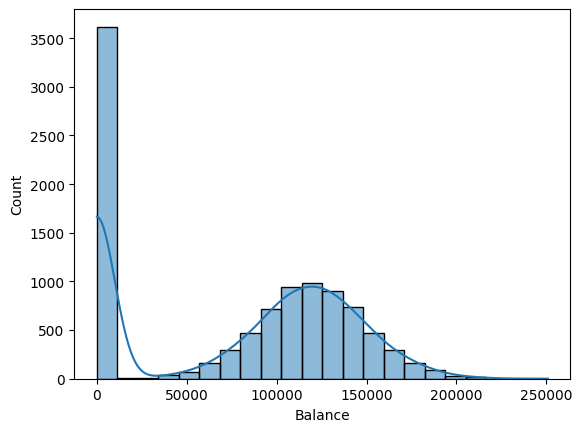

In [36]:
sns.histplot(df['Balance'], kde = True)
plt.show()

In [37]:
df[df['Balance'] == 0]

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,
1,15634602,619,France,Female,42,2,0.0,1,1,1,101348.88,1
4,15701354,699,France,Female,39,1,0.0,2,0,0,93826.63,0
7,15592531,822,France,Male,50,7,0.0,2,1,1,10062.80,0
12,15737173,497,Spain,Male,24,3,0.0,2,1,0,76390.01,0
13,15632264,476,France,Female,34,10,0.0,2,1,0,26260.98,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9990,15605622,841,Spain,Male,28,4,0.0,2,1,1,179436.60,0
9993,15657105,726,Spain,Male,36,2,0.0,1,1,0,195192.40,0
9995,15719294,800,France,Female,29,2,0.0,2,0,0,167773.55,0


## **NumOfProducts Column**

In [38]:
df['NumOfProducts'].describe()

count    10000.000000
mean         1.530200
std          0.581654
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          4.000000
Name: NumOfProducts, dtype: float64

In [39]:
products_count = df['NumOfProducts'].value_counts()
products_count

NumOfProducts
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64

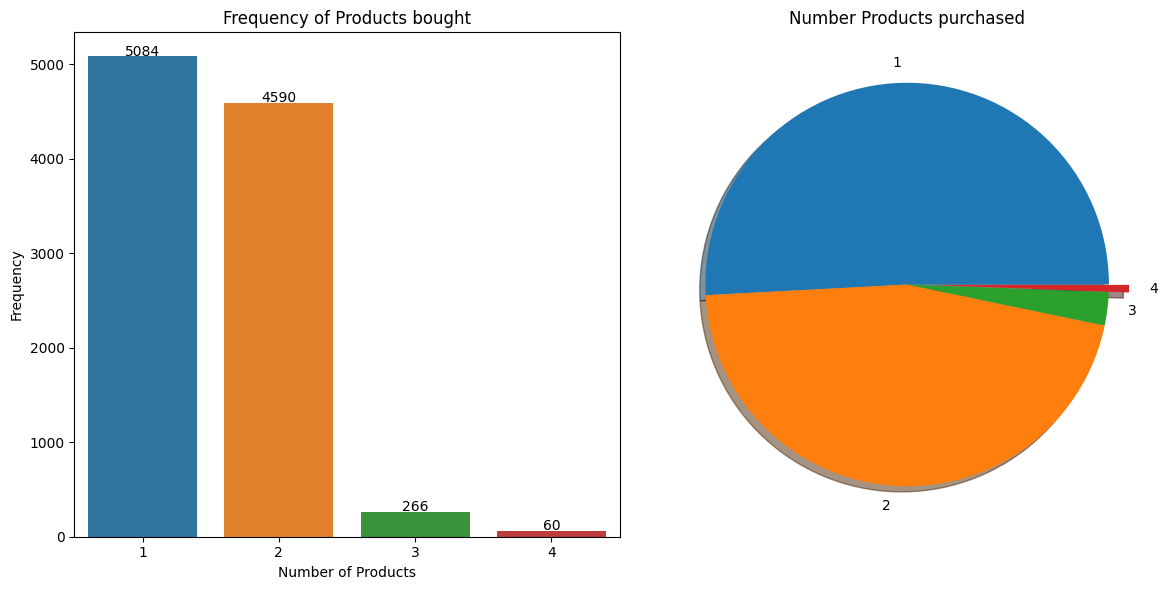

In [40]:
NumOfProducts_count = df['NumOfProducts'].value_counts()

plt.figure(figsize = (12, 6))

plt.subplot(1, 2, 1)
sns.barplot(x = df['NumOfProducts'].value_counts().index,
            y = df['NumOfProducts'].value_counts())
plt.title('Frequency of Products bought')
plt.xlabel('Number of Products')
plt.ylabel('Frequency')

# Display text over bar charts
for i in range(len(NumOfProducts_count)):
    plt.text(i, NumOfProducts_count.iloc[i] + 7, NumOfProducts_count.iloc[i], ha='center')


plt.subplot(1, 2, 2)
plt.pie(x = df['NumOfProducts'].value_counts(),
        labels = df['NumOfProducts'].value_counts().index,
        explode = [0, 0, 0, 0.1],
        normalize = True,
        shadow = True)

plt.title('Number Products purchased')
plt.tight_layout()
plt.show()

In [41]:
products_percent = df['NumOfProducts'].value_counts(normalize = True)*100
products_percent

NumOfProducts
1    50.84
2    45.90
3     2.66
4     0.60
Name: proportion, dtype: float64

In [42]:
# Frequency Table
freq_table = pd.DataFrame(data = {'Count': products_count, 'Percentage%': products_percent})
freq_table

,Count,Percentage%
NumOfProducts,,
1,5084,50.84
2,4590,45.90
3,266,2.66
4,60,0.60


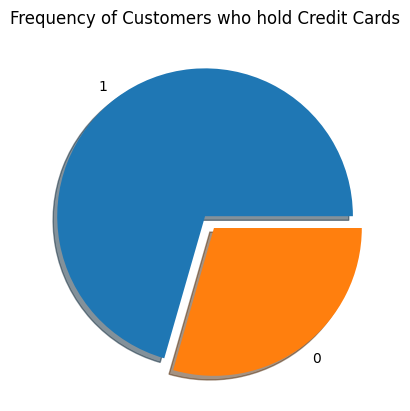

In [43]:
plt.pie(x = df['HasCrCard'].value_counts(),
        labels = df['HasCrCard'].value_counts().index,
        explode = [0, 0.1],
        normalize = True,
        shadow = True)

plt.title('Frequency of Customers who hold Credit Cards')
plt.show()

In [44]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [45]:
df['Exited'].value_counts(normalize = True)*100

Exited
0    79.63
1    20.37
Name: proportion, dtype: float64

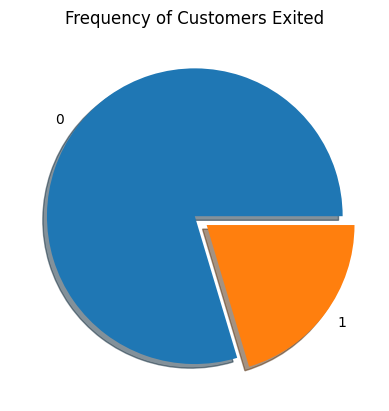

In [46]:
plt.pie(x = df['Exited'].value_counts(),
        labels = df['Exited'].value_counts().index,
        explode = [0, 0.1],
        normalize = True,
        shadow = True)

plt.title('Frequency of Customers Exited')
plt.show()

In [47]:
df['EstimatedSalary'].describe()

count     10000.000000
mean     100090.239881
std       57510.492818
min          11.580000
25%       51002.110000
50%      100193.915000
75%      149388.247500
max      199992.480000
Name: EstimatedSalary, dtype: float64

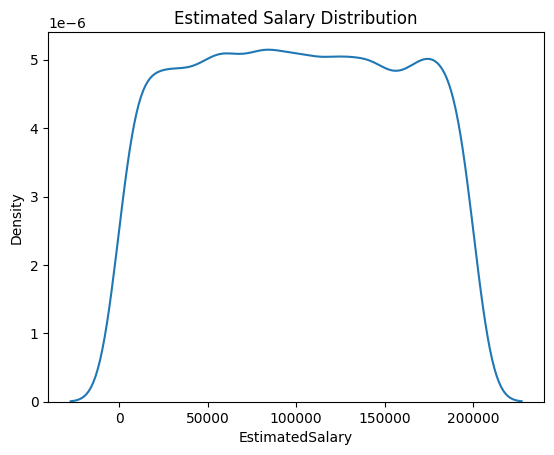

In [48]:
sns.kdeplot(df['EstimatedSalary'])
plt.title('Estimated Salary Distribution')
plt.show()
# Normal Distribution

# **Data Preprocessing**

In [49]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [50]:
X

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
RowNumber,,,,,,,,,,,
1,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88
2,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
3,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57
4,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63
5,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...,...
9996,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64
9997,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77
9998,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58


In [51]:
y

RowNumber
1        1
2        0
3        1
4        0
5        0
        ..
9996     0
9997     0
9998     1
9999     1
10000    0
Name: Exited, Length: 10000, dtype: int64

In [52]:
from sklearn.preprocessing import LabelEncoder

In [53]:
encoder = LabelEncoder()
df['Geography'] = encoder.fit_transform(df['Geography'])

In [54]:
df.head()

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,
1,15634602,619,0,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,608,2,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,502,0,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,699,0,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,850,2,Female,43,2,125510.82,1,1,1,79084.10,0


In [55]:
encoder = LabelEncoder()
df['Gender'] = encoder.fit_transform(df['Gender'])

In [56]:
df.head()

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,
1,15634602,619,0,0,42,2,0.00,1,1,1,101348.88,1
2,15647311,608,2,0,41,1,83807.86,1,0,1,112542.58,0
3,15619304,502,0,0,42,8,159660.80,3,1,0,113931.57,1
4,15701354,699,0,0,39,1,0.00,2,0,0,93826.63,0
5,15737888,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [57]:
df.corr()

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CustomerId,1.000000,0.005308,0.006516,-0.002641,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005308,1.000000,0.007888,-0.002857,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Geography,0.006516,0.007888,1.000000,0.004719,0.022812,0.003739,0.069408,0.003972,-0.008523,0.006724,-0.001369,0.035943
Gender,-0.002641,-0.002857,0.004719,1.000000,-0.027544,0.014733,0.012087,-0.021859,0.005766,0.022544,-0.008112,-0.106512
Age,0.009497,-0.003965,0.022812,-0.027544,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.014883,0.000842,0.003739,0.014733,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.012419,0.006268,0.069408,0.012087,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.016972,0.012238,0.003972,-0.021859,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.014025,-0.005458,-0.008523,0.005766,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.001665,0.025651,0.006724,0.022544,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
